# NumPy

> NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

NumPy is the foundation for so much in Python and data science. It's multidimensional array object allows for tremendous performance gains when compared against typical Python structures and operations. For this reason when dealing with large amount of numerical data NumPy is almost exlusively used. We will focus on learning about NumPy's array type and common utility functions for working with numerical data.

Let's compare some basic operations in standard Python vs NumPy. Let's begin by creating a list of 1 million random numbers uniformly distributed from 0.0 to 100.0.

In [1]:
import random
random.seed(0)
random_data = [random.uniform(0.0, 100.0) for _ in range(1000000)]
random_data

[84.4421851525048,
 75.79544029403024,
 42.0571580830845,
 25.891675029296334,
 51.12747213686085,
 40.49341374504143,
 78.37985890347726,
 30.331272607892746,
 47.65969541523558,
 58.33820394550312,
 90.81128851953352,
 50.468685581739024,
 28.18378443997038,
 75.58042041572239,
 61.83689966753316,
 25.050634136244053,
 90.97462559682401,
 98.2785476037653,
 81.02172359965896,
 90.21659504395826,
 31.014756931933263,
 72.98317482601287,
 89.88382879679935,
 68.39839319154413,
 47.21427154527134,
 10.07012080683658,
 43.41718354537837,
 61.08869734438016,
 91.30110532378983,
 96.66063677707588,
 47.7009776552717,
 86.530992777164,
 26.04923103919594,
 80.50278270130224,
 54.86993038355893,
 1.4041700164018955,
 71.97046864039541,
 39.882354222426876,
 82.4844977148233,
 66.81532012318509,
 0.11428193144282783,
 49.35778664653247,
 86.76027754927809,
 24.3910876887132,
 32.520436274739005,
 87.04712321086546,
 19.106709150239055,
 56.75107406206719,
 23.86159286152202,
 96.7540250290143

Let's perform and time a few simple operations on this list: sum and sort.

In [2]:
%%timeit
sum(random_data)

4.51 ms ± 423 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%%timeit
sorted(random_data)

225 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The sum operation on a regular Python list of 1 million elements is a few milliseconds, and sorting is a few hundred milliseconds. Now let us convert this to a *NumPy array* and perform the same operations:

In [4]:
import numpy as np
numpy_random_data = np.array(random_data)
numpy_random_data

array([84.44218515, 75.79544029, 42.05715808, ..., 33.67626138,
       62.65250366, 39.46958219])

In [5]:
%%timeit
numpy_random_data.sum()

228 µs ± 8.51 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
%%timeit
numpy_random_data.sort()

7.66 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Using NumPy arrays these times are reduced to a few hundred *microseconds* and a few milliseconds respectively for summing and sorting. This is a tremendous improvement! These times may not seem significant, but this is only summing and sorting - for larger and more complex operations the performance gains are even more substantial. Let's revisit how we even created the NumPy array:

```python
import numpy as np
numpy_random_data = np.array(random_data)
```

First we need to import NumPy into Python so that we can use it. It is conventional to alias the `numpy` package as `np`. Once we have import NumPy we can access the `array` object, which can be constructed from a Python list. Note that constucting an array this way copies the input list! An array in NumPy is a one dimensional structure, though we can combine single dimensional arrays into multidimensional arrays (i.e. matricies). We can observe the shape of an array using the `shape` attribute of an array:

In [7]:
numpy_random_data.shape

(1000000,)

This tuple contains a single element, telling us that the array is 1-dimensional and that one dimension has 1000000 elements. By default NumPy stores arrays in row-major order, and so we can also think of our 1-dimensional 1000000 element array as a 1x1000000 matrix (1 row, 1000000 columns). Creating a multidimensional array is as simple as providing a *nested list* when creating the array:

In [8]:
data = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
sample_matrix = np.array(data)
sample_matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [9]:
sample_matrix.shape

(3, 3)

A unique requirement of multidimensional NumPy arrays is that every row must have the same number of elements! Python lists of lists ignore this requirement, but NumPy cannot!

In [10]:
data = [
    [0, 1, 2], # 3 elements
    [3, 4, 5], # 3 elements
    [6, 7]     # 2 elements
]
sample_matrix = np.array(data)
sample_matrix

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

This error is a little obscure, but it is telling us that the dimensions across all rows must be the same (it was expecting 3 elements in the last row!). We have a number of ways of creating arrays and multidimensional arrays with preset sizes and shapes. It is common to want to create a default array or matrix containing all 0s or 1s, and NumPy gives us helper functions to do exactly that:  

In [11]:
all_zeros = np.zeros(shape=(5, 10))
all_zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
all_ones = np.ones(shape=(5, 10))
all_ones

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

We can also create arrays and matrices with other default values, but just need to use the *fill* function to fill the object with that value:

In [13]:
all_twos = np.zeros(shape=(10, 2))
all_twos.fill(2)
all_twos

array([[2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.]])

Note here that these values are *floting point* numbers - what if we want an array of integers? We need to tell NumPy what datatype we want to use, otherwise it will assume a floating point value type.

In [14]:
all_twos.dtype

dtype('float64')

We can tell NumPy the type of the array elements by specifying the `dtype` of the array when creating it. Below we are going to tell NumPy to make an array of integers, suing NumPy's special integer type (it has a few of these!).

In [15]:
all_int_twos = np.zeros(shape=(10, 2), dtype=np.int32)
all_int_twos.fill(2)
all_int_twos

array([[2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2]], dtype=int32)

In [16]:
all_int_twos.dtype

dtype('int32')

The "32" in the name of the type indicates that the integers should be 32-bit, or 4-byte, integers. We can use 32-bit integers over 64-bit integers to save memory, and thus processing time! NumPy out of the box provides the many integer and floating point types, we are largely only concerned with the following:

* `np.int8` - 8-bit signed integer
* `np.int16` - 16-bit signed integer
* `np.int32` - 32-bit signed integer
* `np.int64` - 64-bit signed integer
* `np.uint8` - 8-bit unsigned integer
* `np.uint16` - 16-bit unsigned integer
* `np.uint32` - 32-bit unsigned integer
* `np.uint64` - 64-bit unsigned integer
* `np.float32` - 32-bit single precision floating point number
* `np.float64` - 64-bit double precision floating point number

There are 128-bit and 256-bit variants of some of these, but are largely unnecessary for what we will be doing in this course. If we try using Python's types when creating an array, NumPy will replace it with the appropriate NumPy type:

In [17]:
np.array([], dtype=int).dtype, np.array([], dtype=float).dtype

(dtype('int64'), dtype('float64'))

We can also create identify matrices:

In [18]:
np.identity(5, dtype=np.int32)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int32)

Many utility functions in NumPy that generate data produce that data as arrays; from these arrays we can *reshape* them into matrices. Take for example generating random numbers in NumPy: 

In [19]:
np.random.seed(0)
random_matrix = np.random.randint(0, 100, 144).reshape((12,12))
random_matrix

array([[44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88],
       [88, 12, 58, 65, 39, 87, 46, 88, 81, 37, 25, 77],
       [72,  9, 20, 80, 69, 79, 47, 64, 82, 99, 88, 49],
       [29, 19, 19, 14, 39, 32, 65,  9, 57, 32, 31, 74],
       [23, 35, 75, 55, 28, 34,  0,  0, 36, 53,  5, 38],
       [17, 79,  4, 42, 58, 31,  1, 65, 41, 57, 35, 11],
       [46, 82, 91,  0, 14, 99, 53, 12, 42, 84, 75, 68],
       [ 6, 68, 47,  3, 76, 52, 78, 15, 20, 99, 58, 23],
       [79, 13, 85, 48, 49, 69, 41, 35, 64, 95, 69, 94],
       [ 0, 50, 36, 34, 48, 93,  3, 98, 42, 77, 21, 73],
       [ 0, 10, 43, 58, 23, 59,  2, 98, 62, 35, 94, 67],
       [82, 46, 99, 20, 81, 50, 27, 14, 41, 58, 65, 36]])

Here we are asking NumPy to generate 144 random integers between 0 and 100. NumPy returns this to us as a large 1-dimensional array. If we want to turn this into a matrix, we can use the `reshape` function. This function will return a new matrix (copied from the array) such that the data is broken into rows. We asked NumPy to reshape the large array into a 12x12 matrix (remember that 12*12=144!).

We can also have NumPy generate evenly spaced data using either ranges or linear-spaces:

In [20]:
# create an array of floating point numbers in the range [0, 100)], taking every 4th number, reshaped into a 5x5 matrix
np.arange(0.0, 100.0, 4.0).reshape((5,5))

array([[ 0.,  4.,  8., 12., 16.],
       [20., 24., 28., 32., 36.],
       [40., 44., 48., 52., 56.],
       [60., 64., 68., 72., 76.],
       [80., 84., 88., 92., 96.]])

In [21]:
np.linspace(0, 100, 30).reshape((5,6)) # create an array of 30 evenly distributed integers in the range [0, 100], reshaped into a 5x6 matrix

array([[  0.        ,   3.44827586,   6.89655172,  10.34482759,
         13.79310345,  17.24137931],
       [ 20.68965517,  24.13793103,  27.5862069 ,  31.03448276,
         34.48275862,  37.93103448],
       [ 41.37931034,  44.82758621,  48.27586207,  51.72413793,
         55.17241379,  58.62068966],
       [ 62.06896552,  65.51724138,  68.96551724,  72.4137931 ,
         75.86206897,  79.31034483],
       [ 82.75862069,  86.20689655,  89.65517241,  93.10344828,
         96.55172414, 100.        ]])

## Selecting Data

Selecting and indexing data from a NumPy array is effectively the same as with a Python list, but there are some bonuses with NumPy! Let's use the randomized matrix that we just created.

In [22]:
random_matrix

array([[44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88],
       [88, 12, 58, 65, 39, 87, 46, 88, 81, 37, 25, 77],
       [72,  9, 20, 80, 69, 79, 47, 64, 82, 99, 88, 49],
       [29, 19, 19, 14, 39, 32, 65,  9, 57, 32, 31, 74],
       [23, 35, 75, 55, 28, 34,  0,  0, 36, 53,  5, 38],
       [17, 79,  4, 42, 58, 31,  1, 65, 41, 57, 35, 11],
       [46, 82, 91,  0, 14, 99, 53, 12, 42, 84, 75, 68],
       [ 6, 68, 47,  3, 76, 52, 78, 15, 20, 99, 58, 23],
       [79, 13, 85, 48, 49, 69, 41, 35, 64, 95, 69, 94],
       [ 0, 50, 36, 34, 48, 93,  3, 98, 42, 77, 21, 73],
       [ 0, 10, 43, 58, 23, 59,  2, 98, 62, 35, 94, 67],
       [82, 46, 99, 20, 81, 50, 27, 14, 41, 58, 65, 36]])

In [23]:
random_matrix[2] # get the 3rd row

array([72,  9, 20, 80, 69, 79, 47, 64, 82, 99, 88, 49])

In [24]:
random_matrix[2, 7] # get the 3rd row, 8th column

64

In [25]:
random_matrix[:, 3] # slice the 4th column

array([67, 65, 80, 14, 55, 42,  0,  3, 48, 34, 58, 20])

In [26]:
random_matrix[0:6, 0:6] # slice both axes, taking the first half of each, giving us a "quadrant" of data

array([[44, 47, 64, 67, 67,  9],
       [88, 12, 58, 65, 39, 87],
       [72,  9, 20, 80, 69, 79],
       [29, 19, 19, 14, 39, 32],
       [23, 35, 75, 55, 28, 34],
       [17, 79,  4, 42, 58, 31]])

## Operations

We can use arithmetic operations on arrays *if and only if the operation is well defined for the shapes of the arrays*. There are both scalar and matrix operations that we can apply. Here are a few examples of of some scalar operations:

In [27]:
data = np.ones(shape=(10,10))
data

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [28]:
# scalar addition
data + 1

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [29]:
# scalar multiplication
data * 10

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])

In [30]:
# we can combine operations
data * 10 + 1

array([[11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.]])

In [31]:
# we can even raise elements to some power!
(data + 1) ** 4

array([[16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.]])

We also have matrix operations, some of which require the other matrix to have a compatible shape!

In [32]:
# for these examples let's set up a 1x3 matrix (an array) with the list [1, 2, 3] and two 3x3 matrices, one with the numbers 0 through 8, and another 10 through 18

array_1 = np.array([1, 2, 3])
data_1 = np.array(np.arange(0,9).tolist()).reshape((3,3))
data_2 = np.array(np.arange(10,19).tolist()).reshape((3,3))

array_1, data_1, data_2

(array([1, 2, 3]),
 array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]))

We can perform element-wise addition, subtraction, mutplication, etc. using the standard operators

In [33]:
data_1 + data_2

array([[10, 12, 14],
       [16, 18, 20],
       [22, 24, 26]])

In [34]:
data_1 * data_2

array([[  0,  11,  24],
       [ 39,  56,  75],
       [ 96, 119, 144]])

In [35]:
# adding an array and a matrix can only be done if they have compatible shapes!
# 1x3 and 3x3 are compatible shapes! but, say, 1x4 or 2x3 are not compatible with 3x3.
# this compatibility is called broadcasting, and is only successful when all dimenions
# either match or one of them is 1
array_1 + data_1

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11]])

We can also perform common matrix operations, like conputing dot products, cross products, and even computing the determinant:

In [36]:
np.dot(array_1, data_1)

array([24, 30, 36])

In [37]:
np.cross(array_1, data_1)

array([[ 1, -2,  1],
       [-2,  4, -2],
       [-5, 10, -5]])

In [38]:
np.linalg.det(data_1)

0.0

## Exercise

NumPy is really great at applying functions to arrays and matrices in large batches, so long as the function is *vectorized*. This means that the function is designed to operate on entire arrays. We want to use NumPy to generate the points on the edge of a circle. We can do this by generating a linear spacing of values from 0 to $2\pi$ and then applying trigonometric functions to that array to build the vertices.

Take a moment to:

1. define a variable named `angles` using a NumPy linear space from 0 to $2\pi$ with 100 elements
2. define a variable named `x_verts` using the NumPy function `np.cos` and passing in `angles`
3. define a variable named `y_verts` using the NumPy function `np.sin` and passing in `angles`

In [39]:

angles = np.linspace(0.0, 2 * np.pi, 100)
x_verts = np.cos(angles)
y_verts = np.sin(angles)


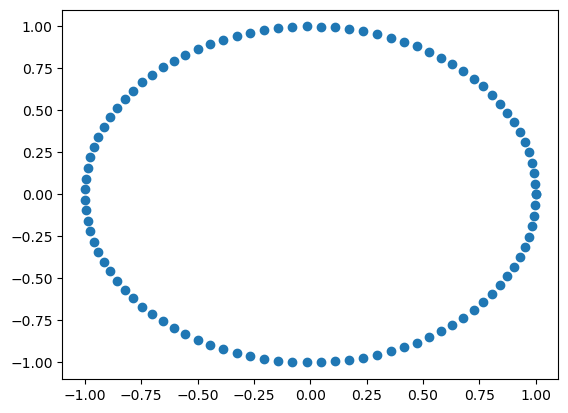

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x_verts, y_verts)